In [1]:
import numpy as np
import pandas as pd

In [2]:
import os 
import sys
sys.path.append(os.path.abspath('../common')) # add path to common functions

In [21]:
from preprocess import getdfs

train_df, valid_df = getdfs(data = 'text_seq', train_size = 1)

In [22]:
train_df.head()

,input_str,label
0,0000154364642718159661428002624223132284159626...,0
1,0004641596369515436422262614110471596262476161...,0
2,0001543626215965999614422464135806142624051159...,0
3,0000154364224641238614262159689561596284351061...,1
4,0004641899422154362069015966142624761262159661...,1


In [23]:
train_df['input_str'] = train_df['input_str'].apply(lambda x : x[3:])
valid_df['input_str'] = valid_df['input_str'].apply(lambda x : x[3:])

In [24]:
train_df.head()

,input_str,label
0,01543646427181596614280026242231322841596262614,0
1,46415963695154364222626141104715962624761614284,0
2,15436262159659996144224641358061426240511596284,0
3,01543642246412386142621596895615962843510614262,1
4,46418994221543620690159661426247612621596614284,1


In [29]:
num_feat = 47

def get_columns (df) :
    for i in range(num_feat):
        df[f'c_{i}'] = df['input_str'].apply(lambda x : x[i])
    return df.drop(columns = ['input_str'])

In [30]:
train_df = get_columns(train_df)
valid_df = get_columns(valid_df)

In [31]:
train_df.head()

,label,c_0,c_1,c_2,c_3,c_4,c_5,c_6,c_7,c_8,...,c_37,c_38,c_39,c_40,c_41,c_42,c_43,c_44,c_45,c_46
0,0,0,1,5,4,3,6,4,6,4,...,1,5,9,6,2,6,2,6,1,4
1,0,4,6,4,1,5,9,6,3,6,...,4,7,6,1,6,1,4,2,8,4
2,0,1,5,4,3,6,2,6,2,1,...,0,5,1,1,5,9,6,2,8,4
3,1,0,1,5,4,3,6,4,2,2,...,3,5,1,0,6,1,4,2,6,2
4,1,4,6,4,1,8,9,9,4,2,...,1,5,9,6,6,1,4,2,8,4


In [32]:
x_train = train_df.drop(columns = ['label']).values
y_train = train_df['label'].values

x_valid = valid_df.drop(columns = ['label']).values
y_valid = valid_df['label'].values

In [34]:
from models import predict_random_forest, predict_xgboost, predict_mlp, predict_logistic_regression, predict_svc
from evaluate import evaluate_predictions

              precision    recall  f1-score   support

     Class 0       0.62      0.69      0.66       252
     Class 1       0.63      0.55      0.59       237

    accuracy                           0.63       489
   macro avg       0.63      0.62      0.62       489
weighted avg       0.63      0.63      0.62       489



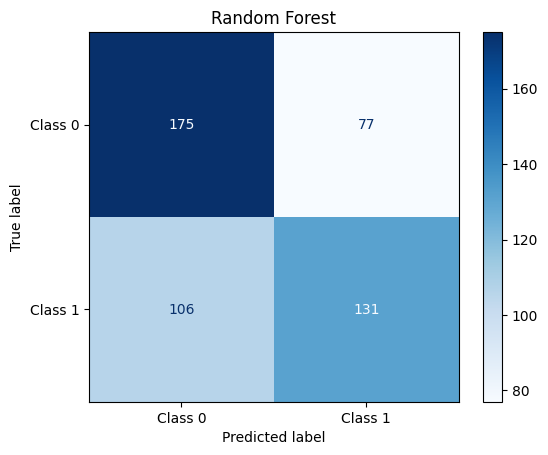

Accuracy is 0.6257668711656442


In [35]:
y_pred_rf = predict_random_forest(x_train, y_train, x_valid)
evaluate_predictions(y_valid, y_pred_rf, 'Random Forest')


[01:35:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.



              precision    recall  f1-score   support

     Class 0       0.67      0.69      0.68       252
     Class 1       0.66      0.63      0.64       237

    accuracy                           0.66       489
   macro avg       0.66      0.66      0.66       489
weighted avg       0.66      0.66      0.66       489



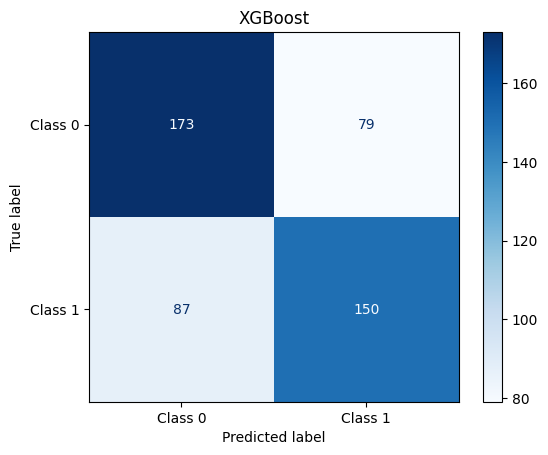

Accuracy is 0.6605316973415133


In [36]:
y_pred_xgb = predict_xgboost(x_train, y_train, x_valid)
evaluate_predictions(y_valid, y_pred_xgb, 'XGBoost')

              precision    recall  f1-score   support

     Class 0       0.54      0.58      0.56       252
     Class 1       0.52      0.48      0.50       237

    accuracy                           0.53       489
   macro avg       0.53      0.53      0.53       489
weighted avg       0.53      0.53      0.53       489



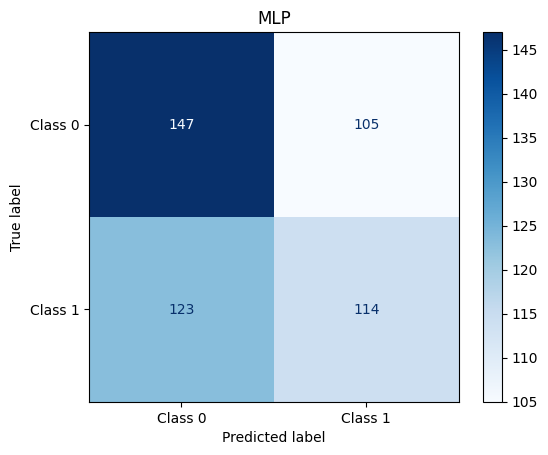

Accuracy is 0.5337423312883436


In [37]:
y_pred_mlp = predict_mlp(x_train, y_train, x_valid)
evaluate_predictions(y_valid, y_pred_mlp, 'MLP')

              precision    recall  f1-score   support

     Class 0       0.55      0.61      0.58       252
     Class 1       0.53      0.47      0.50       237

    accuracy                           0.54       489
   macro avg       0.54      0.54      0.54       489
weighted avg       0.54      0.54      0.54       489



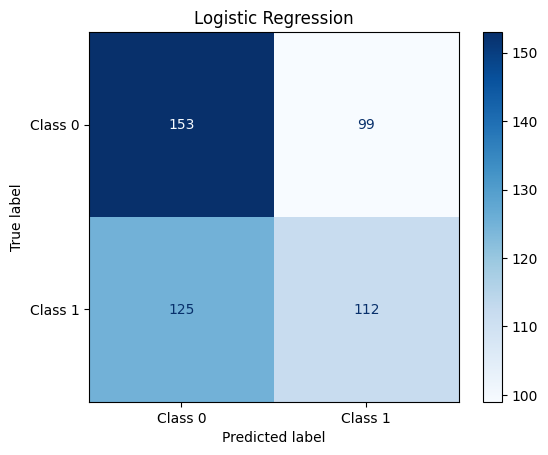

Accuracy is 0.5419222903885481


In [38]:
y_pred_lr = predict_logistic_regression(x_train, y_train, x_valid)
evaluate_predictions(y_valid, y_pred_lr, 'Logistic Regression')

/home/arush-upadhyaya/anaconda3/envs/771/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


              precision    recall  f1-score   support

     Class 0       0.57      0.72      0.63       252
     Class 1       0.58      0.41      0.48       237

    accuracy                           0.57       489
   macro avg       0.57      0.57      0.56       489
weighted avg       0.57      0.57      0.56       489



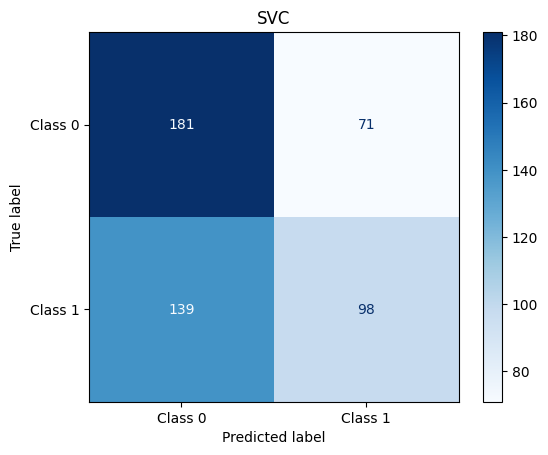

Accuracy is 0.5705521472392638


In [39]:
y_pred_svc = predict_svc(x_train, y_train, x_valid)
evaluate_predictions(y_valid, y_pred_svc, 'SVC')

## One Hot Encoding

In [44]:
# Feature engineering (example: one-hot encoding)
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()

all_df = pd.concat([train_df, valid_df])
all_df_encoded = encoder.fit_transform(all_df.drop("label", axis=1)).toarray()

In [45]:
x_train = all_df_encoded[:len(train_df)]
x_valid = all_df_encoded[len(train_df):]

In [47]:
y_train = train_df['label'].values
y_valid = valid_df['label'].values

[01:45:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.



              precision    recall  f1-score   support

     Class 0       0.71      0.68      0.70       252
     Class 1       0.68      0.71      0.69       237

    accuracy                           0.70       489
   macro avg       0.70      0.70      0.70       489
weighted avg       0.70      0.70      0.70       489



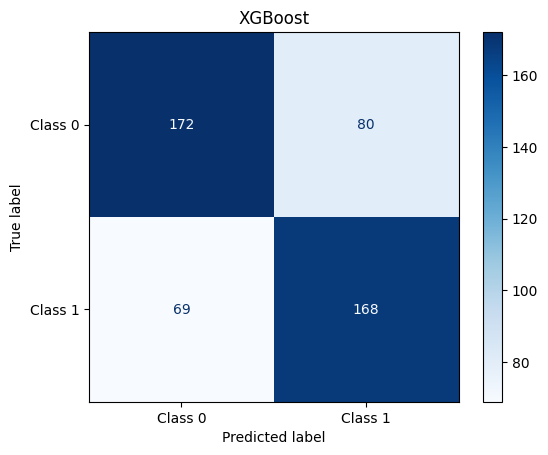

Accuracy is 0.6952965235173824
              precision    recall  f1-score   support

     Class 0       0.66      0.67      0.67       252
     Class 1       0.65      0.63      0.64       237

    accuracy                           0.65       489
   macro avg       0.65      0.65      0.65       489
weighted avg       0.65      0.65      0.65       489



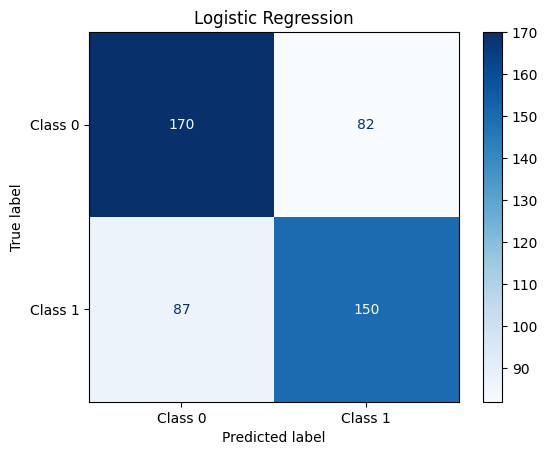

Accuracy is 0.65439672801636


/home/arush-upadhyaya/anaconda3/envs/771/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


              precision    recall  f1-score   support

     Class 0       0.59      0.47      0.53       252
     Class 1       0.54      0.65      0.59       237

    accuracy                           0.56       489
   macro avg       0.57      0.56      0.56       489
weighted avg       0.57      0.56      0.56       489



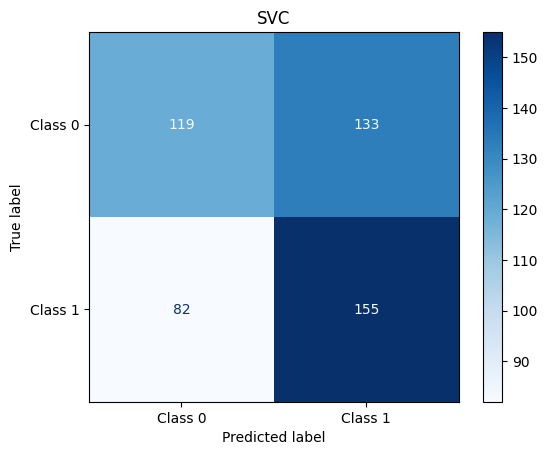

Accuracy is 0.5603271983640081
              precision    recall  f1-score   support

     Class 0       0.68      0.69      0.68       252
     Class 1       0.66      0.66      0.66       237

    accuracy                           0.67       489
   macro avg       0.67      0.67      0.67       489
weighted avg       0.67      0.67      0.67       489



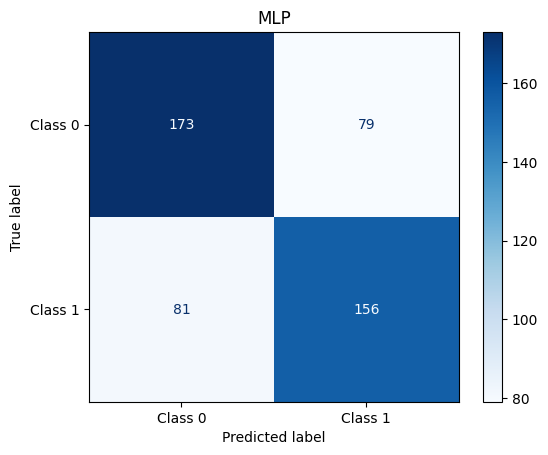

Accuracy is 0.6728016359918201
              precision    recall  f1-score   support

     Class 0       0.65      0.71      0.68       252
     Class 1       0.66      0.60      0.63       237

    accuracy                           0.66       489
   macro avg       0.66      0.65      0.65       489
weighted avg       0.66      0.66      0.66       489



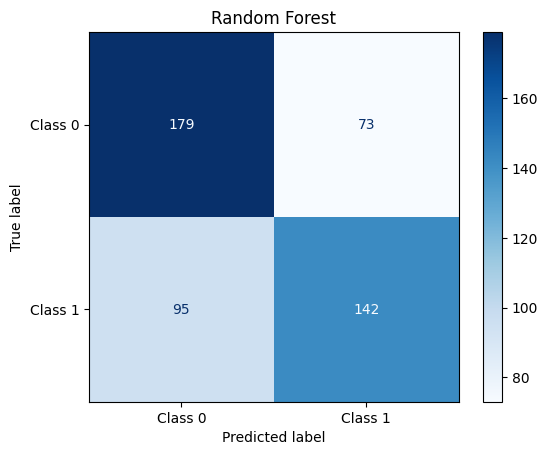

Accuracy is 0.656441717791411


In [51]:
y_pred_xgb = predict_xgboost(x_train, y_train, x_valid)
evaluate_predictions(y_valid, y_pred_xgb, 'XGBoost')

y_pred_lr = predict_logistic_regression(x_train, y_train, x_valid)
evaluate_predictions(y_valid, y_pred_lr, 'Logistic Regression')

y_pred_svc = predict_svc(x_train, y_train, x_valid)
evaluate_predictions(y_valid, y_pred_svc, 'SVC')

y_pred_mlp = predict_mlp(x_train, y_train, x_valid)
evaluate_predictions(y_valid, y_pred_mlp, 'MLP')

y_pred_rf = predict_random_forest(x_train, y_train, x_valid)
evaluate_predictions(y_valid, y_pred_rf, 'Random Forest')

## TFIDF

In [ ]:
def insert_spaces(string):
  """Inserts spaces between all two characters in a string.
  Args:
    string: The input string.

  Returns:
    The string with spaces inserted between all two characters.
  """

  result = ""
  for i in range(len(string)):
    result += string[i]
    if i < len(string) - 1:
      result += " "
  return result


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming your data is in a DataFrame named 'data'

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer(analyzer='word')

# Fit and transform the data
x_train = vectorizer.fit_transform(data["text_features"])
x_valid     